In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.neighbors import KNeighborsClassifier

In [4]:
data = pd.read_csv('Downloads/Bot Twitter.csv')

In [5]:
Jika kolom berisi 1 dan 0 berarti itu adalah data kategorik dengan 1 adalah ya dan 0 adalah tidak.
Screen name			: Screen name sama dengan username
Foto profil			: Foto profil yang digunakan adalah foto diri sendiri atau bukan
Following			: Jumlah following
Following kurang dari 30 	: Apakah jumlah following kurang dari 30
Followers			: Jumlah followers
Followers lebih dari 1000 	: Apakah jumlah followers lebih dari 1000
Tweet				: Jumlah tweet
Tweet kurang dari 50		: Apakah jumlah tweet kurang dari 50
Lokasi				: Mencantumkan lokasi apa tidak
URL				: Mencantumkan link pada profil apa tidak
Deskripsi			: Mengisi bio pada profil apa tidak
Follower ratio 2:1		: Perbandingan jumlah following dan jumlah followers 2:1
Follower ratio 50:1		: Perbandingan jumlah following dan jumlah followers 50:1
Follower ratio 100:1		: Perbandingan jumlah following dan jumlah followers 100:1
Pola aktivitas akun		: Akun memiliki pola tertentu dalam beraktivitas
Usia akun			: Usia akun dalam bulan
Usia akun kurang sama dengan 12	: Apakah usia akun kurang dari sama dengan 12 bulan apa tidak
Rataan tweet perminggu	: Rata-rata tweets dalam satu minggu
Retweet ratio 			: Rasio retweet terhadap jumlah tweet (dalam persen)
Retweet ratio lebih dari sama dengan 60 : Apakah retweet ratio lebih dari 60% apa tidak
Kategori			: Apakah akun ini termasuk bot apa tidak?


SyntaxError: invalid syntax (<ipython-input-5-9a6e14662f3c>, line 1)

In [6]:
data.head()

,ID,Screen name,Foto Profil,Following,Following kurang 30,Followers,Followers lebih 1000,Tweet,Tweet kurang 50,Lokasi,...,Follower Ratio 2:1,Follower Ratio 50:1,Follower Ratio 100:1,Pola Aktivitas Akun,Usia Akun (bulan),Usia Akun kurang sama dengan 12,Rataan Tweet per Minggu,Retweet Ratio %,Retweet Ratio lebih sama dengan 60,Kategori
0,"1,32E+22",1,0,53,0,25,0,3,1,1,...,1,0,0,1,0,1,0.29,33,0,1
1,"1,32E+23",1,0,218,0,52,0,3,1,1,...,0,0,0,0,0,1,0.25,0,0,0
2,"1,33E+23",1,0,530,0,123,0,5,1,1,...,0,0,0,0,0,1,0.65,0,0,0
3,"1,33E+23",1,1,237,0,18,0,6,1,1,...,0,0,0,1,0,1,0.77,0,1,1
4,"1,35E+23",1,0,94,0,31,0,14,1,1,...,0,0,0,1,0,1,3700.00,86,1,1


In [7]:
data.tail()

,ID,Screen name,Foto Profil,Following,Following kurang 30,Followers,Followers lebih 1000,Tweet,Tweet kurang 50,Lokasi,...,Follower Ratio 2:1,Follower Ratio 50:1,Follower Ratio 100:1,Pola Aktivitas Akun,Usia Akun (bulan),Usia Akun kurang sama dengan 12,Rataan Tweet per Minggu,Retweet Ratio %,Retweet Ratio lebih sama dengan 60,Kategori
1995,15605485,1,1,973,0,710,0,6858,0,0,...,1,0,0,1,148,0,86.0,7,0,0
1996,14305560,0,1,326,0,1469005,1,255012,0,1,...,0,0,0,0,152,0,100.0,0,0,0
1997,7300962,1,1,513,0,115,1,1500,1,0,...,0,0,0,0,161,0,1.0,0,0,0
1998,5641772,1,0,4931,0,29043,1,78101,0,0,...,0,0,0,1,162,0,130.0,22,0,1
1999,492873531,1,1,546,0,1020,1,23639,0,1,...,0,0,0,0,196,0,1.0,0,0,0


In [8]:
data.shape

(2000, 22)

In [9]:
data.columns

Index(['ID', 'Screen name', 'Foto Profil', 'Following', 'Following kurang 30',
       'Followers', 'Followers lebih 1000', 'Tweet', 'Tweet kurang 50',
       'Lokasi', 'URL', 'Deskripsi', 'Follower Ratio 2:1',
       'Follower Ratio 50:1', 'Follower Ratio 100:1', 'Pola Aktivitas Akun',
       'Usia Akun (bulan)', 'Usia Akun kurang sama dengan 12',
       'Rataan Tweet per Minggu', 'Retweet Ratio %',
       'Retweet Ratio lebih sama dengan 60', 'Kategori'],
      dtype='object')

In [10]:
data.info()
#tidak terdapat missing value

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 22 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   ID                                  2000 non-null   object 
 1   Screen name                         2000 non-null   int64  
 2   Foto Profil                         2000 non-null   int64  
 3   Following                           2000 non-null   int64  
 4   Following kurang 30                 2000 non-null   int64  
 5   Followers                           2000 non-null   int64  
 6   Followers lebih 1000                2000 non-null   int64  
 7   Tweet                               2000 non-null   int64  
 8   Tweet kurang 50                     2000 non-null   int64  
 9   Lokasi                              2000 non-null   int64  
 10  URL                                 2000 non-null   int64  
 11  Deskripsi                           2000 no

In [11]:
data.isna().sum()

ID                                    0
Screen name                           0
Foto Profil                           0
Following                             0
Following kurang 30                   0
Followers                             0
Followers lebih 1000                  0
Tweet                                 0
Tweet kurang 50                       0
Lokasi                                0
URL                                   0
Deskripsi                             0
Follower Ratio 2:1                    0
Follower Ratio 50:1                   0
Follower Ratio 100:1                  0
Pola Aktivitas Akun                   0
Usia Akun (bulan)                     0
Usia Akun kurang sama dengan 12       0
Rataan Tweet per Minggu               0
Retweet Ratio %                       0
Retweet Ratio lebih sama dengan 60    0
Kategori                              0
dtype: int64

In [12]:
data.drop(columns=['ID','Screen name', 'Foto Profil', 'Deskripsi'], inplace=True)

In [13]:
data.head()

,Following,Following kurang 30,Followers,Followers lebih 1000,Tweet,Tweet kurang 50,Lokasi,URL,Follower Ratio 2:1,Follower Ratio 50:1,Follower Ratio 100:1,Pola Aktivitas Akun,Usia Akun (bulan),Usia Akun kurang sama dengan 12,Rataan Tweet per Minggu,Retweet Ratio %,Retweet Ratio lebih sama dengan 60,Kategori
0,53,0,25,0,3,1,1,0,1,0,0,1,0,1,0.29,33,0,1
1,218,0,52,0,3,1,1,0,0,0,0,0,0,1,0.25,0,0,0
2,530,0,123,0,5,1,1,0,0,0,0,0,0,1,0.65,0,0,0
3,237,0,18,0,6,1,1,0,0,0,0,1,0,1,0.77,0,1,1
4,94,0,31,0,14,1,1,0,0,0,0,1,0,1,3700.00,86,1,1


In [14]:
data.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Following,2000.0,1087.301500,3152.951083,0.0,138.0,426.0,1096.50,97896.0
Following kurang 30,2000.0,0.059500,0.236617,0.0,0.0,0.0,0.00,1.0
Followers,2000.0,17609.795500,186071.392186,0.0,63.0,308.0,1044.25,6074499.0
Followers lebih 1000,2000.0,0.319000,0.466206,0.0,0.0,0.0,1.00,1.0
Tweet,2000.0,15510.353500,58984.505705,0.0,560.0,3451.0,11076.75,1744574.0
Tweet kurang 50,2000.0,0.095000,0.293288,0.0,0.0,0.0,0.00,1.0
Lokasi,2000.0,0.516500,0.499853,0.0,0.0,1.0,1.00,1.0
URL,2000.0,0.264500,0.441177,0.0,0.0,0.0,1.00,1.0
Follower Ratio 2:1,2000.0,0.259500,0.438470,0.0,0.0,0.0,1.00,1.0
Follower Ratio 50:1,2000.0,0.024000,0.153087,0.0,0.0,0.0,0.00,1.0


In [15]:
data.duplicated().sum()

0

In [16]:
data.drop(columns=['Lokasi', 'URL', 'Usia Akun (bulan)', 'Usia Akun kurang sama dengan 12'], inplace=True)

In [17]:
data.head()

,Following,Following kurang 30,Followers,Followers lebih 1000,Tweet,Tweet kurang 50,Follower Ratio 2:1,Follower Ratio 50:1,Follower Ratio 100:1,Pola Aktivitas Akun,Rataan Tweet per Minggu,Retweet Ratio %,Retweet Ratio lebih sama dengan 60,Kategori
0,53,0,25,0,3,1,1,0,0,1,0.29,33,0,1
1,218,0,52,0,3,1,0,0,0,0,0.25,0,0,0
2,530,0,123,0,5,1,0,0,0,0,0.65,0,0,0
3,237,0,18,0,6,1,0,0,0,1,0.77,0,1,1
4,94,0,31,0,14,1,0,0,0,1,3700.00,86,1,1


In [18]:
data.shape

(2000, 14)

In [19]:
data.rename(columns={'Rataan Tweet per Minggu':'rataan_tweet_perminggu', 'Retweet Ratio %':'rasio_tweet'}, inplace=True)

In [20]:
data.head()

,Following,Following kurang 30,Followers,Followers lebih 1000,Tweet,Tweet kurang 50,Follower Ratio 2:1,Follower Ratio 50:1,Follower Ratio 100:1,Pola Aktivitas Akun,rataan_tweet_perminggu,rasio_tweet,Retweet Ratio lebih sama dengan 60,Kategori
0,53,0,25,0,3,1,1,0,0,1,0.29,33,0,1
1,218,0,52,0,3,1,0,0,0,0,0.25,0,0,0
2,530,0,123,0,5,1,0,0,0,0,0.65,0,0,0
3,237,0,18,0,6,1,0,0,0,1,0.77,0,1,1
4,94,0,31,0,14,1,0,0,0,1,3700.00,86,1,1


### analisis target

In [21]:
data.Kategori.value_counts()

1    1000
0    1000
Name: Kategori, dtype: int64

### numeric vs target

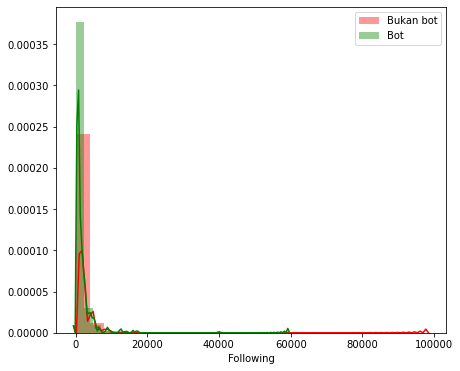

In [22]:
plt.figure(figsize=(7,6))
sns.distplot(data.Following[data.Kategori ==0], bins = 25, color='r', label='Bukan bot')
sns.distplot(data.Following[data.Kategori ==1], bins = 25, color='g', label='Bot')
plt.legend();
#Semakin dikit following maka frekuensi bukan bot dan bot meningkat

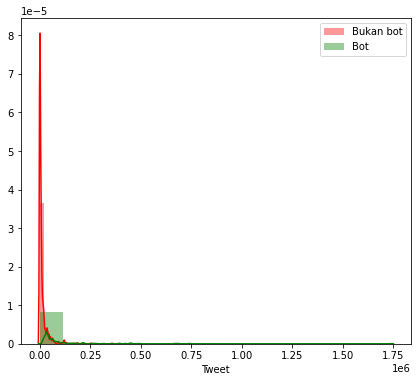

In [23]:
plt.figure(figsize=(7,6))
sns.distplot(data.Tweet[data.Kategori ==0], bins = 15, color='r', label='Bukan bot')
sns.distplot(data.Tweet[data.Kategori ==1], bins = 15, color='g', label='Bot')
plt.legend();
#semakin dikit tweet maka frekuensi bot dan bukan bot semakin banyak

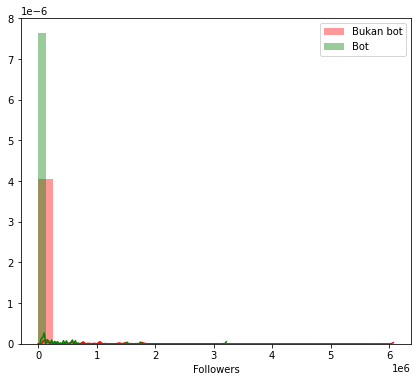

In [24]:
plt.figure(figsize=(7,6))
sns.distplot(data.Followers[data.Kategori ==0], bins = 25, color='r', label='Bukan bot')
sns.distplot(data.Followers[data.Kategori ==1], bins = 25, color='g', label='Bot')
plt.legend();

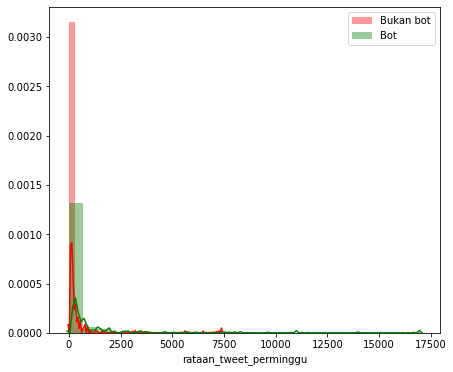

In [25]:
plt.figure(figsize=(7,6))
sns.distplot(data.rataan_tweet_perminggu[data.Kategori ==0], bins = 25, color='r', label='Bukan bot')
sns.distplot(data.rataan_tweet_perminggu[data.Kategori ==1], bins = 25, color='g', label='Bot')
plt.legend();

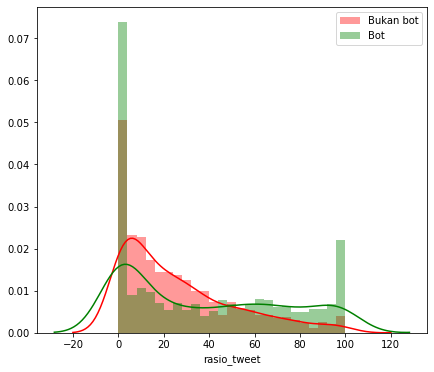

In [26]:
plt.figure(figsize=(7,6))
sns.distplot(data.rasio_tweet[data.Kategori ==0], bins = 25, color='r', label='Bukan bot')
sns.distplot(data.rasio_tweet[data.Kategori ==1], bins = 25, color='g', label='Bot')
plt.legend();

### categoric vs target

In [27]:
data.rename(columns={'Following kurang 30':'following_kurang_30', 'Followers lebih 1000':'followers_lebih_1000', 'Tweet kurang 50':'tweet_kurang_50',
                    'Follower Ratio 2:1':'rasio_follower_2_1', 'Follower Ratio 50:1':'rasio_follower_50_1', 'Follower Ratio 100:1':'rasio_follower_100_1',
                    'Pola Aktivitas Akun':'pola_aktivitas_akun', 'Retweet Ratio lebih sama dengan 60':'rasio_retweet_lebih_sama_dengan_60'}, inplace=True)

In [28]:
data.head()

,Following,following_kurang_30,Followers,followers_lebih_1000,Tweet,tweet_kurang_50,rasio_follower_2_1,rasio_follower_50_1,rasio_follower_100_1,pola_aktivitas_akun,rataan_tweet_perminggu,rasio_tweet,rasio_retweet_lebih_sama_dengan_60,Kategori
0,53,0,25,0,3,1,1,0,0,1,0.29,33,0,1
1,218,0,52,0,3,1,0,0,0,0,0.25,0,0,0
2,530,0,123,0,5,1,0,0,0,0,0.65,0,0,0
3,237,0,18,0,6,1,0,0,0,1,0.77,0,1,1
4,94,0,31,0,14,1,0,0,0,1,3700.00,86,1,1


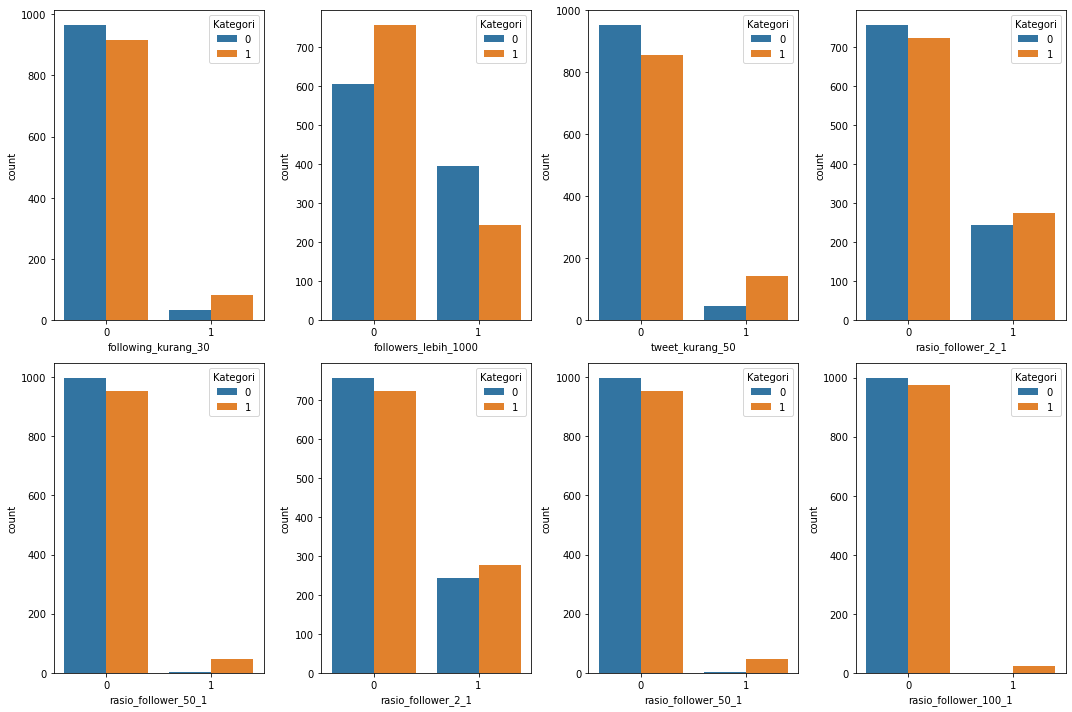

In [29]:
cat_var = ['following_kurang_30', 'followers_lebih_1000', 'tweet_kurang_50', 'rasio_follower_2_1', 'rasio_follower_50_1',
          'rasio_follower_2_1','rasio_follower_50_1','rasio_follower_100_1', 'pola_aktivitas_akun', 'rasio_retweet_lebih_sama_dengan_60']

fig, axes = plt.subplots(2, 4, figsize=(15,10)) #dimensi 2 X 4

for cat, ax in zip(cat_var, axes.flatten()):
    sns.countplot(cat, data=data, hue='Kategori', ax=ax)

plt.tight_layout()

### data preparation

In [30]:
data.head()

,Following,following_kurang_30,Followers,followers_lebih_1000,Tweet,tweet_kurang_50,rasio_follower_2_1,rasio_follower_50_1,rasio_follower_100_1,pola_aktivitas_akun,rataan_tweet_perminggu,rasio_tweet,rasio_retweet_lebih_sama_dengan_60,Kategori
0,53,0,25,0,3,1,1,0,0,1,0.29,33,0,1
1,218,0,52,0,3,1,0,0,0,0,0.25,0,0,0
2,530,0,123,0,5,1,0,0,0,0,0.65,0,0,0
3,237,0,18,0,6,1,0,0,0,1,0.77,0,1,1
4,94,0,31,0,14,1,0,0,0,1,3700.00,86,1,1


In [31]:
x = data.drop(columns='Kategori')
y = data.Kategori

In [32]:
x

,Following,following_kurang_30,Followers,followers_lebih_1000,Tweet,tweet_kurang_50,rasio_follower_2_1,rasio_follower_50_1,rasio_follower_100_1,pola_aktivitas_akun,rataan_tweet_perminggu,rasio_tweet,rasio_retweet_lebih_sama_dengan_60
0,53,0,25,0,3,1,1,0,0,1,0.29,33,0
1,218,0,52,0,3,1,0,0,0,0,0.25,0,0
2,530,0,123,0,5,1,0,0,0,0,0.65,0,0
3,237,0,18,0,6,1,0,0,0,1,0.77,0,1
4,94,0,31,0,14,1,0,0,0,1,3700.00,86,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,973,0,710,0,6858,0,1,0,0,1,86.00,7,0
1996,326,0,1469005,1,255012,0,0,0,0,0,100.00,0,0
1997,513,0,115,1,1500,1,0,0,0,0,1.00,0,0
1998,4931,0,29043,1,78101,0,0,0,0,1,130.00,22,0


In [33]:
y

0       1
1       0
2       0
3       1
4       1
       ..
1995    0
1996    0
1997    0
1998    1
1999    0
Name: Kategori, Length: 2000, dtype: int64

### modelling

##### dataset splitting

In [34]:
x.shape

(2000, 13)

In [35]:
y.shape

(2000,)

In [36]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, stratify=y, random_state=42)
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((1600, 13), (400, 13), (1600,), (400,))

##### preprocessor

In [37]:
numerical_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', MinMaxScaler()) 
])

categorical_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='most_frequent')), 
    ('onehot', OneHotEncoder()) 
])

preprocessor = ColumnTransformer([
    ('for_numeric', numerical_pipeline, ['Following','Followers','Tweet', 'rataan_tweet_perminggu', 'rasio_tweet']), 
    ('for_categoric', categorical_pipeline, ['following_kurang_30','followers_lebih_1000','tweet_kurang_50','rasio_follower_2_1',
                                            'rasio_follower_50_1', 'rasio_follower_100_1', 'pola_aktivitas_akun', 'rasio_retweet_lebih_sama_dengan_60']) 
])

In [38]:
pipeline = Pipeline([
    ('prep', preprocessor),
    ('algo', KNeighborsClassifier())
])

In [39]:
parameter = {
    'algo__n_neighbors':range(1,51,2), #jumlah tetangga yang ingin dicoba
    'algo__weights':['uniform','distance'],
    'algo__p':[1,2] #1 manhattan dan 2 euclidean distance (jenis distance)
}
model = GridSearchCV(pipeline, parameter, cv=3, n_jobs=-1, verbose=1)
model.fit(x_train, y_train)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:   23.5s
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:   29.3s
[Parallel(n_jobs=-1)]: Done 300 out of 300 | elapsed:   33.8s finished


GridSearchCV(cv=3,
             estimator=Pipeline(steps=[('prep',
                                        ColumnTransformer(transformers=[('for_numeric',
                                                                         Pipeline(steps=[('imputer',
                                                                                          SimpleImputer()),
                                                                                         ('scaler',
                                                                                          MinMaxScaler())]),
                                                                         ['Following',
                                                                          'Followers',
                                                                          'Tweet',
                                                                          'rataan_tweet_perminggu',
                                                                      

In [40]:
print(model.best_params_)
print(model.score(x_train,y_train), model.best_score_ ,model.score(x_test,y_test))

{'algo__n_neighbors': 41, 'algo__p': 1, 'algo__weights': 'distance'}
1.0 0.7143603328859564 0.6975
